### Information

    price
    price in US dollars ($326 - $18,823)
    carat
    weight of the diamond (0.2 - 5.01)
    cut
    quality of the cut (Fair, Good, Very Good, Premium, Ideal)
    color
    diamond colour, from J (worst) to D (best)
    clarity
    a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
    x
    length in mm (0--10.74)
    y
    width in mm (0--58.9)
    z
    depth in mm (0--31.8)
    depth
    total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
    table
    width of top of diamond relative to widest point (43--95)

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diamonds.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
df.rename(columns={'x':'length in mm', 'y':'width in mm', 'z':'depth in mm','depth':'total depth'}, inplace=True)

In [7]:
df.head()

,carat,cut,color,clarity,total depth,table,price,length in mm,width in mm,depth in mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.shape

(53940, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   cut           53940 non-null  object 
 2   color         53940 non-null  object 
 3   clarity       53940 non-null  object 
 4   total depth   53940 non-null  float64
 5   table         53940 non-null  float64
 6   price         53940 non-null  int64  
 7   length in mm  53940 non-null  float64
 8   width in mm   53940 non-null  float64
 9   depth in mm   53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
df.describe() # 3 featurs has min 0

,carat,total depth,table,price,length in mm,width in mm,depth in mm
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
df = df[df['length in mm'] != 0] # removing 0 values

In [12]:
df = df[df['depth in mm'] != 0]

In [13]:
df.isnull().sum()

carat           0
cut             0
color           0
clarity         0
total depth     0
table           0
price           0
length in mm    0
width in mm     0
depth in mm     0
dtype: int64

In [14]:
df.duplicated().sum()

145

In [15]:
df.drop_duplicates(keep='first', inplace=True) 

<AxesSubplot:xlabel='price', ylabel='carat'>

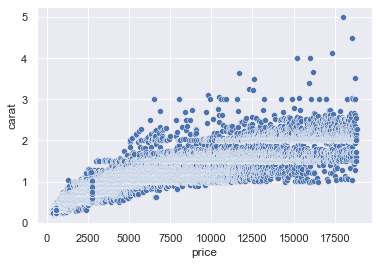

In [16]:
sns.scatterplot(x=df['price'],y=df['carat'])

<AxesSubplot:xlabel='price', ylabel='carat'>

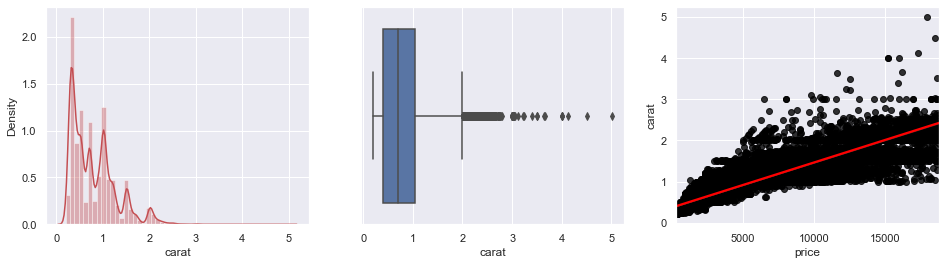

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.distplot(df['carat'],color='r')

plt.subplot(1,3,2)
sns.boxplot(df['carat'])

plt.subplot(1,3,3)
sns.regplot(data=df, x='price', y='carat', scatter_kws={'color':'black'},line_kws={'color':'red'})

In [18]:
per75 = df['carat'].quantile(0.75) # iqr for outliers
per25 = df['carat'].quantile(0.25)

In [19]:
iqr = per75 - per25
iqr

0.64

In [20]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 2.0
lower limit: -0.5599999999999999


In [21]:
df = df[(df['carat'] < upper_limit) & (df['carat'] > lower_limit)]

<AxesSubplot:xlabel='price', ylabel='carat'>

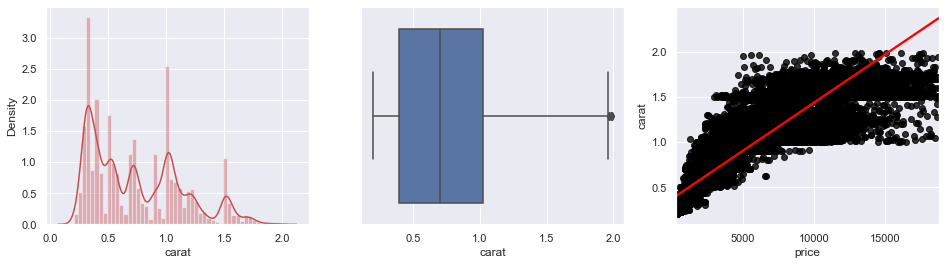

In [22]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.distplot(df['carat'],color='r')

plt.subplot(1,3,2)
sns.boxplot(df['carat'])

plt.subplot(1,3,3)
sns.regplot(data=df, x='price', y='carat', scatter_kws={'color':'black'},line_kws={'color':'red'})

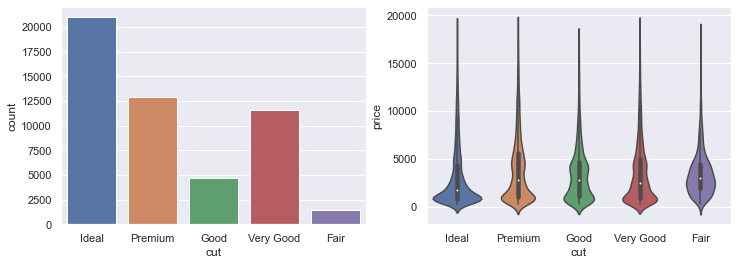

Ideal        20973
Premium      12929
Very Good    11620
Good          4679
Fair          1444
Name: cut, dtype: int64


In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x=df['cut'])

plt.subplot(1,2,2)
sns.violinplot(x=df['cut'], y=df['price'])
plt.show()

print(df['cut'].value_counts())

In [24]:
df['cut'].replace({'Ideal':4, 'Premium':3, 'Very Good':2, 'Good':1, 'Fair':0}, inplace=True)

In [25]:
df.head()

,carat,cut,color,clarity,total depth,table,price,length in mm,width in mm,depth in mm
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75


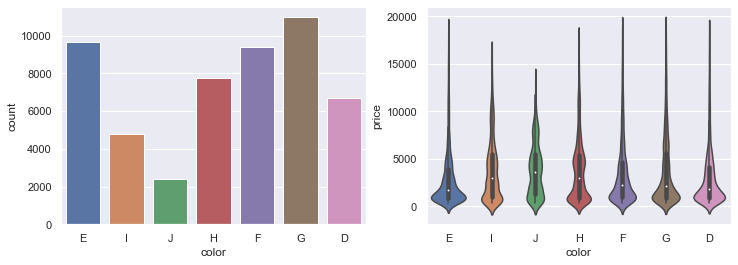

G    10978
E     9676
F     9375
H     7743
D     6698
I     4796
J     2379
Name: color, dtype: int64


In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x=df['color'])

plt.subplot(1,2,2)
sns.violinplot(x=df['color'], y=df['price'])
plt.show()

print(df['color'].value_counts())

In [27]:
df['color'].replace({'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0}, inplace=True)

In [28]:
df.head()

,carat,cut,color,clarity,total depth,table,price,length in mm,width in mm,depth in mm
0,0.23,4,5,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,SI2,63.3,58.0,335,4.34,4.35,2.75


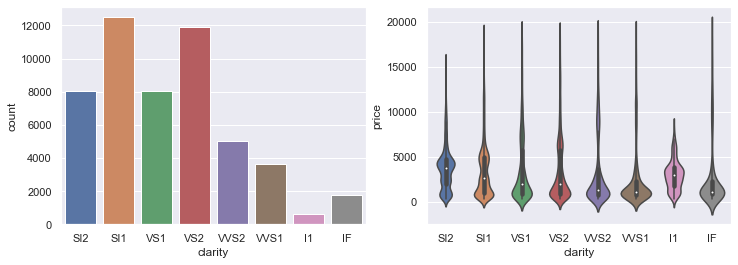

SI1     12501
VS2     11928
SI2      8072
VS1      8050
VVS2     5048
VVS1     3641
IF       1780
I1        625
Name: clarity, dtype: int64


In [29]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x=df['clarity'])

plt.subplot(1,2,2)
sns.violinplot(x=df['clarity'], y=df['price'])
plt.show()

print(df['clarity'].value_counts())

In [30]:
df['clarity'].replace({'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7},inplace=True)

In [31]:
df.head()

,carat,cut,color,clarity,total depth,table,price,length in mm,width in mm,depth in mm
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


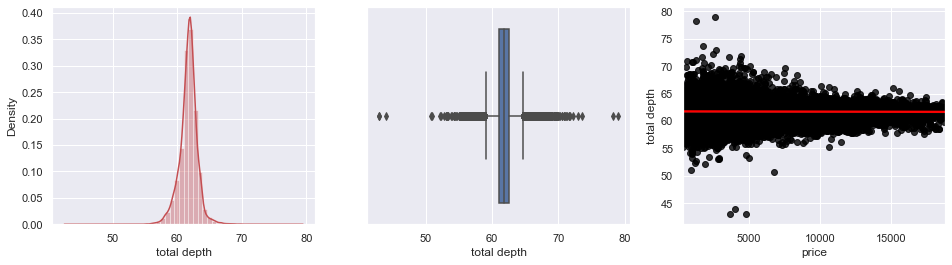

In [32]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.distplot(df['total depth'],color='r')

plt.subplot(1,3,2)
sns.boxplot(df['total depth'])

plt.subplot(1,3,3)
sns.regplot(data=df, x='price', y='total depth', scatter_kws={'color':'black'},line_kws={'color':'red'})
plt.show()

In [33]:
print('upper limit', df['total depth'].mean() + 3 * df['total depth'].std()) # 3 and -3 standard deviation 
print('lower limit', df['total depth'].mean() - 3 * df['total depth'].std()) # it's good for normal distribution

upper limit 65.97187863706561
lower limit 57.51912726863677


In [34]:
df = df[(df['total depth'] < 65.97) & (df['total depth'] > 57.51)] # removing the outliers

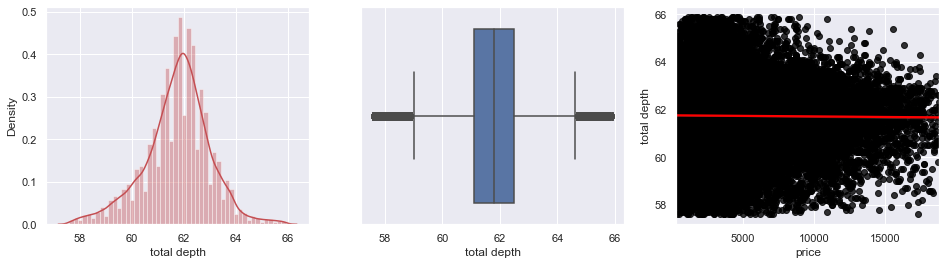

In [35]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.distplot(df['total depth'],color='r')

plt.subplot(1,3,2)
sns.boxplot(df['total depth'])

plt.subplot(1,3,3)
sns.regplot(data=df, x='price', y='total depth', scatter_kws={'color':'black'},line_kws={'color':'red'})
plt.show()

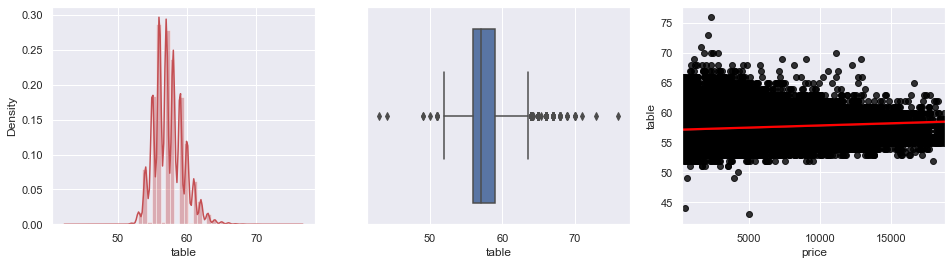

In [36]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.distplot(df['table'],color='r')

plt.subplot(1,3,2)
sns.boxplot(df['table'])

plt.subplot(1,3,3)
sns.regplot(data=df, x='price', y='table', scatter_kws={'color':'black'},line_kws={'color':'red'})
plt.show()

In [37]:
print('upper limit', df['table'].mean() + 3 * df['table'].std())  
print('lower limit', df['table'].mean() - 3 * df['table'].std())

upper limit 63.90967033852739
lower limit 50.869621064933185


In [38]:
df = df[(df['table'] < 63.90) & (df['table'] > 50.86)]

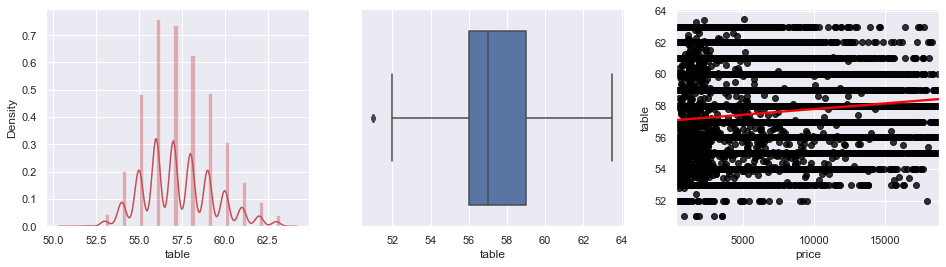

In [39]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.distplot(df['table'],color='r')

plt.subplot(1,3,2)
sns.boxplot(df['table'])

plt.subplot(1,3,3)
sns.regplot(data=df, x='price', y='table', scatter_kws={'color':'black'},line_kws={'color':'red'})
plt.show()

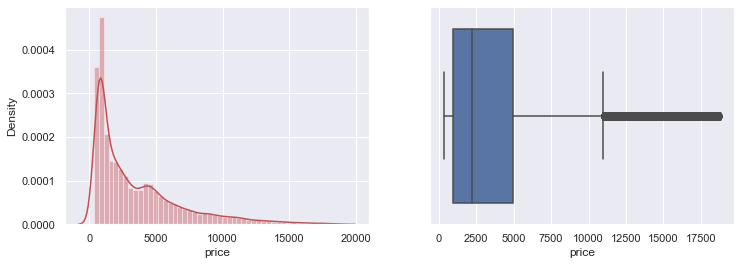

In [40]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['price'],color='r')

plt.subplot(1,2,2)
sns.boxplot(df['price'])

plt.show()

In [41]:
df1 = df.copy()

In [42]:
df1['price'] = np.log(df['price']) # log trainsformation

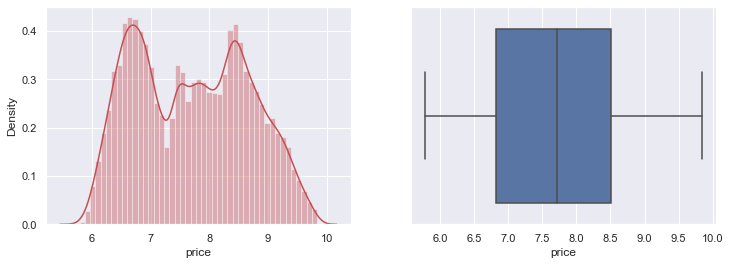

In [43]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df1['price'],color='r')

plt.subplot(1,2,2)
sns.boxplot(df1['price'])

plt.show()

In [44]:
df1.head()

,carat,cut,color,clarity,total depth,table,price,length in mm,width in mm,depth in mm
0,0.23,4,5,1,61.5,55.0,5.786897,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,5.786897,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,5.811141,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,5.814131,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,5.817111,3.94,3.96,2.48


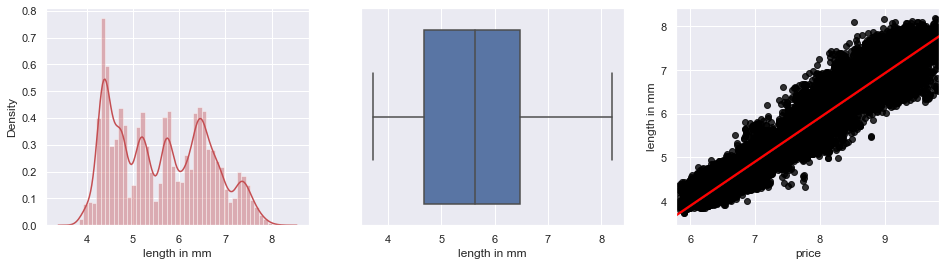

In [45]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.distplot(df1['length in mm'],color='r')

plt.subplot(1,3,2)
sns.boxplot(df1['length in mm'])

plt.subplot(1,3,3)
sns.regplot(data=df1, x='price', y='length in mm', scatter_kws={'color':'black'},line_kws={'color':'red'})
plt.show()

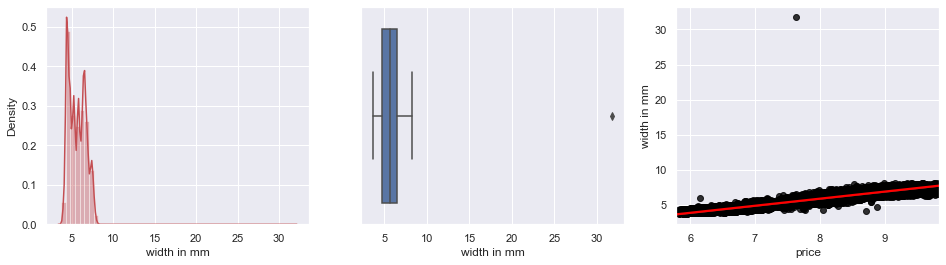

In [46]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.distplot(df1['width in mm'],color='r')

plt.subplot(1,3,2)
sns.boxplot(df1['width in mm'])    # outliers!!!!!!!!!!!!!

plt.subplot(1,3,3)
sns.regplot(data=df1, x='price', y='width in mm', scatter_kws={'color':'black'},line_kws={'color':'red'})
plt.show()

In [47]:
#df1 = df1[(df1['width in mm'] < 20)]

In [48]:
per75 = df1['width in mm'].quantile(0.75)
per25 = df1['width in mm'].quantile(0.25)

In [49]:
iqr = per75 - per25
iqr

1.7799999999999994

In [50]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 9.139999999999999
lower limit: 2.0200000000000014


In [51]:
df1 = df1[(df1['width in mm'] < upper_limit) & (df1['width in mm'] > lower_limit)]

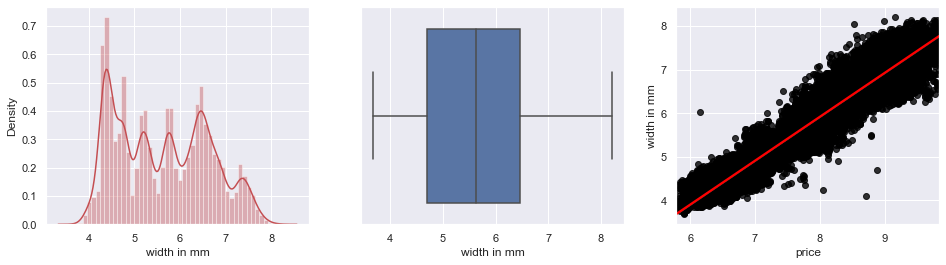

In [52]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.distplot(df1['width in mm'],color='r')

plt.subplot(1,3,2)
sns.boxplot(df1['width in mm'])

plt.subplot(1,3,3)
sns.regplot(data=df1, x='price', y='width in mm', scatter_kws={'color':'black'},line_kws={'color':'red'})
plt.show()

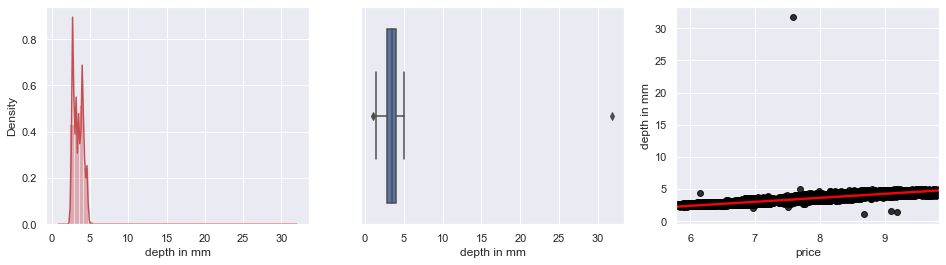

In [53]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.distplot(df1['depth in mm'],color='r')

plt.subplot(1,3,2)
sns.boxplot(df1['depth in mm'])

plt.subplot(1,3,3)
sns.regplot(data=df1, x='price', y='depth in mm', scatter_kws={'color':'black'},line_kws={'color':'red'})
plt.show()

In [54]:
per75 = df1['depth in mm'].quantile(0.75)
per25 = df1['depth in mm'].quantile(0.25)

In [55]:
iqr = per75 - per25
iqr

1.12

In [56]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 5.68
lower limit: 1.1999999999999997


In [57]:
df1 = df1[(df1['depth in mm'] < upper_limit) & (df1['depth in mm'] > lower_limit)]

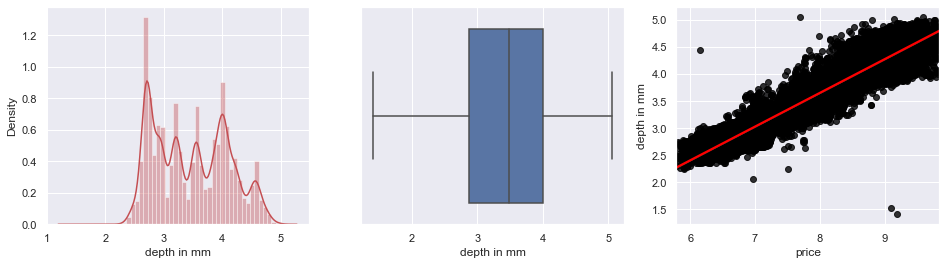

In [58]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.distplot(df1['depth in mm'],color='r')

plt.subplot(1,3,2)
sns.boxplot(df1['depth in mm'])

plt.subplot(1,3,3)
sns.regplot(data=df1, x='price', y='depth in mm', scatter_kws={'color':'black'},line_kws={'color':'red'})
plt.show()

In [59]:
df1.corr()['price']

carat           0.942253
cut            -0.073584
color          -0.097449
clarity        -0.166793
total depth    -0.000037
table           0.148552
price           1.000000
length in mm    0.962721
width in mm     0.963032
depth in mm     0.959416
Name: price, dtype: float64

<AxesSubplot:>

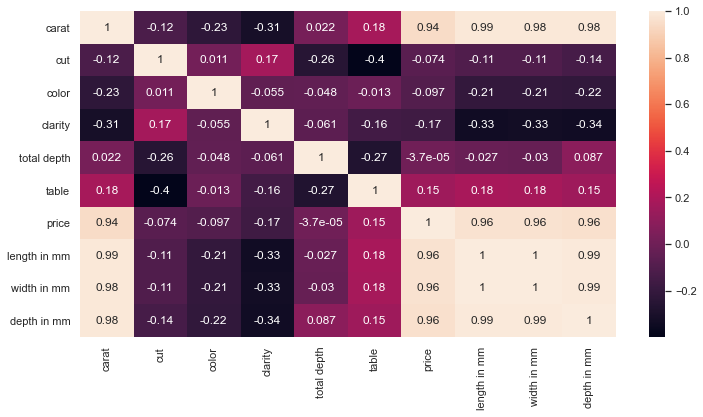

In [60]:
plt.figure(figsize=(12,6))          # 'length' and 'width' has very high +ve correlation 
sns.heatmap(df1.corr(),annot=True)  # they are doing the same work to estimate the price so we can drop 1 of them

In [61]:
df1.head()

,carat,cut,color,clarity,total depth,table,price,length in mm,width in mm,depth in mm
0,0.23,4,5,1,61.5,55.0,5.786897,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,5.786897,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,5.811141,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,5.814131,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,5.817111,3.94,3.96,2.48


In [62]:
X = df1.drop('price', axis=1)
y = df1['price']

In [63]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()

In [64]:
et.fit(X,y)

ExtraTreesRegressor()

<AxesSubplot:>

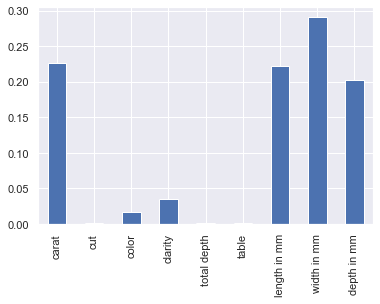

In [65]:
pd.Series(et.feature_importances_,index=X.columns).plot(kind='bar')

In [66]:
df1.drop(columns=['cut','total depth','table'], inplace=True)

In [67]:
df1.head()

,carat,color,clarity,price,length in mm,width in mm,depth in mm
0,0.23,5,1,5.786897,3.95,3.98,2.43
1,0.21,5,2,5.786897,3.89,3.84,2.31
3,0.29,1,3,5.811141,4.20,4.23,2.63
4,0.31,0,1,5.814131,4.34,4.35,2.75
5,0.24,0,5,5.817111,3.94,3.96,2.48


In [68]:
X = df1.drop('price',axis=1)
y = df1.iloc[:,-4]

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

### Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred1 = lr.predict(X_train)

In [72]:
print('-----------Train Score-------------')
print('r2 score:', r2_score(y_train,y_pred1))
print('mse:', mean_squared_error(y_train,y_pred1))
print('mae:', mean_absolute_error(y_train,y_pred1))
print('-----------Test Score-------------')
print('r2 score:', r2_score(y_test,y_pred))
print('mse:', mean_squared_error(y_test,y_pred))
print('mae:', mean_absolute_error(y_test,y_pred))

-----------Train Score-------------
r2 score: 0.9782947453613831
mse: 0.020456637317818115
mae: 0.11087290568049638
-----------Test Score-------------
r2 score: 0.9774117134065354
mse: 0.020915262782431814
mae: 0.11278689393013679


### Support Vector Machine (Regressor)

In [73]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
y_pred1 = svr.predict(X_train)

In [74]:
print('-----------Train Score-------------')
print('r2 score:', r2_score(y_train,y_pred1))
print('mse:', mean_squared_error(y_train,y_pred1))
print('mae:', mean_absolute_error(y_train,y_pred1))
print('-----------Test Score-------------')
print('r2 score:', r2_score(y_test,y_pred))
print('mse:', mean_squared_error(y_test,y_pred))
print('mae:', mean_absolute_error(y_test,y_pred))

-----------Train Score-------------
r2 score: 0.9874798451710906
mse: 0.01179991991627007
mae: 0.08471277638641513
-----------Test Score-------------
r2 score: 0.9868682720621968
mse: 0.012159113506467508
mae: 0.08597525704492766


<AxesSubplot:xlabel='price', ylabel='Density'>

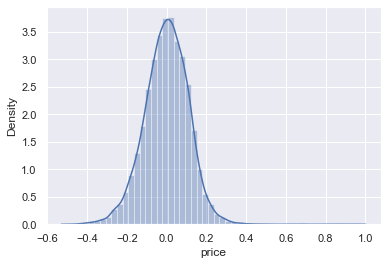

In [75]:
sns.distplot(y_test-y_pred)

In [76]:
y_test[:10]

13795    8.634443
7721     6.363028
3680     8.144969
49942    7.690743
13625    8.626227
53369    7.885329
6873     8.325791
7285     8.343078
1075     6.324359
44809    7.392648
Name: price, dtype: float64

In [77]:
y_pred[:10]

array([8.70220543, 6.46752777, 8.06693014, 7.6871752 , 8.66378608,
       7.85224268, 8.24293893, 8.30688048, 6.21839574, 7.30662659])

In [78]:
import pickle
pickle.dump(svr,open('model.pkl', 'wb'))

In [79]:
df1.head()

,carat,color,clarity,price,length in mm,width in mm,depth in mm
0,0.23,5,1,5.786897,3.95,3.98,2.43
1,0.21,5,2,5.786897,3.89,3.84,2.31
3,0.29,1,3,5.811141,4.20,4.23,2.63
4,0.31,0,1,5.814131,4.34,4.35,2.75
5,0.24,0,5,5.817111,3.94,3.96,2.48


In [80]:
X_train.head()

,carat,color,clarity,length in mm,width in mm,depth in mm
37043,0.34,6,3,4.51,4.54,2.76
51100,0.56,3,5,5.29,5.31,3.29
1566,0.72,1,4,5.80,5.86,3.52
25378,0.31,5,3,4.32,4.36,2.70
17621,1.15,1,4,6.73,6.76,4.16


In [81]:
#from sklearn.model_selection import GridSearchCV

In [82]:
#    param_grid = {
#       'kernel': ['linear','rbf'],
#       'gamma': ['scale','auto'],
#       'C': [1,0.1,2]
#    }

In [83]:
#grid = GridSearchCV(estimator=svr, param_grid=param_grid, cv=10, n_jobs=1)